# GRIP TASK-6

# Prediction using Decision Tree Algorithm on Iris Dataset

## SIDHARTHENEE NAYAK

### Data Science and Business Analytics Internship at The Sparks Foundation

Firstly I have imported all the libraries required for the task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

Now I have stored the IRIS dataset in df variable as a pandas dataframe

In [2]:
df = pd.read_csv('iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Now I have made two lists one which contains the feature names and other which consists of target variables

In [3]:
feature_names = list(df.columns)[:4]
print(feature_names)
target_names = df['Species'].unique()
print(target_names)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


I have plotted a pie-chart showing the percentage of each species present in the dataset

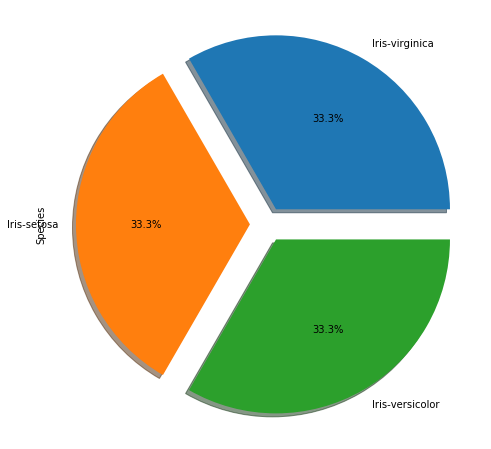

In [4]:
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

Using the seaborn library, I have plotted the relationship between different features of the IRIS dataset by creating a pariplot among different attributes

Text(0.5, 0.98, 'Relation between Sepal Width and Sepal Length')

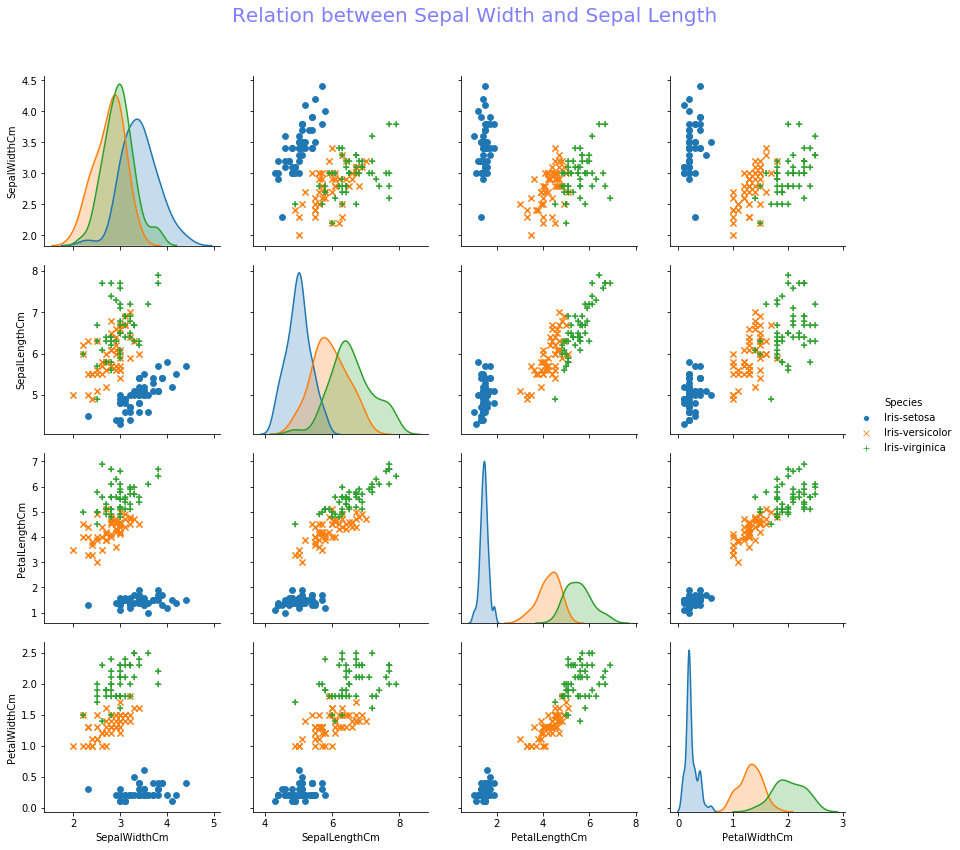

In [5]:

a=sns.pairplot(df,hue='Species',height=3,vars=['SepalWidthCm','SepalLengthCm','PetalLengthCm','PetalWidthCm'],
               kind='scatter',markers=['o','x','+'])

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#remove the top and the right lines
sns.despine()

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9)

#set the title of the graph
a.fig.suptitle('Relation between Sepal Width and Sepal Length',fontsize=20,color='b',alpha=0.5)


Below I have splitted the iris dataset into two different dataframes: one which consists of all the feature values of different values and other which consists of all the target values

In [6]:
features = df.iloc[:,[0,1,2,3]].values
print('The features array is: ')
print(features)
species = df.iloc[:,4].values
print('The three classes are: ')
print(species)

The features array is: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

Now I have splitted the Features and Target values into train set and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, species, test_size = 0.2, random_state=6)

Then I have built the first model by creating an instance of Decision tree classifier by giving appropriate values to the parameters. I have given the default crieterion 'gini' and trained the model

In [8]:
model = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, min_samples_split=15, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

I have predicted the values using the test set and found the accuracy score on both train and test data

In [9]:
y_pred = model.predict(X_test)
print('Train set accuracy is: ',accuracy_score(y_true=y_train, y_pred=model.predict(X_train)))
print('Test set accuracy is: ',accuracy_score(y_true=y_test, y_pred=y_pred))

Train set accuracy is:  0.9666666666666667
Test set accuracy is:  0.9333333333333333


Below, I have drawn a visualization of the Decision Tree model using the plot_tree method 

[Text(125.55000000000001, 190.26, 'PetalWidthCm <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]\nclass = Iris-setosa'), Text(83.7, 135.9, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = Iris-setosa'), Text(167.4, 135.9, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]\nclass = Iris-versicolor'), Text(83.7, 81.53999999999999, 'PetalWidthCm <= 1.45\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = Iris-versicolor'), Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]\nclass = Iris-versicolor'), Text(125.55000000000001, 27.180000000000007, 'gini = 0.32\nsamples = 15\nvalue = [0, 12, 3]\nclass = Iris-versicolor'), Text(251.10000000000002, 81.53999999999999, 'SepalLengthCm <= 6.25\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = Iris-virginica'), Text(209.25, 27.180000000000007, 'gini = 0.18\nsamples = 10\nvalue = [0, 1, 9]\nclass = Iris-virginica'), Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 27\nvalu

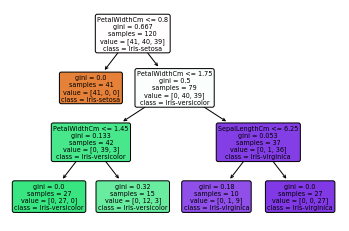

In [10]:
print(tree.plot_tree(model, filled=True, rounded=True, feature_names=feature_names, 
                class_names=target_names))

Now I have built another model by creating an instance of Decision tree classifier by giving appropriate values to the parameters. I have given the crieterion as 'entropy' and trained the model. Then I have predicted the values using the test set and found the accuracy score on both train and test data

In [11]:
model2 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3, min_samples_split=15, random_state=1)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
from sklearn.metrics import accuracy_score
print('Train set accuracy is: ',accuracy_score(y_true=y_train, y_pred=model2.predict(X_train)))
print('Test set accuracy is: ',accuracy_score(y_true=y_test, y_pred=y_pred))

Train set accuracy is:  0.975
Test set accuracy is:  0.9666666666666667


Again, I have drawn a visualization of the second Decision Tree model using the plot_tree method 

[Text(148.8, 195.696, 'PetalWidthCm <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [41, 40, 39]\nclass = Iris-setosa'), Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = Iris-setosa'), Text(186.0, 152.208, 'PetalWidthCm <= 1.75\nentropy = 1.0\nsamples = 79\nvalue = [0, 40, 39]\nclass = Iris-versicolor'), Text(111.60000000000001, 108.72, 'PetalLengthCm <= 5.05\nentropy = 0.371\nsamples = 42\nvalue = [0, 39, 3]\nclass = Iris-versicolor'), Text(74.4, 65.232, 'SepalLengthCm <= 5.05\nentropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]\nclass = Iris-versicolor'), Text(37.2, 21.744, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]\nclass = Iris-versicolor'), Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Iris-versicolor'), Text(148.8, 65.232, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'), Text(260.40000000000003, 108.72, 'PetalLengthCm <= 4.85\nentropy = 0.179\nsamples = 37\nvalue

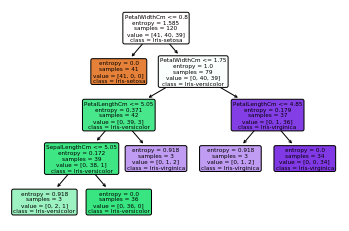

In [12]:
print(tree.plot_tree(model2, filled=True, rounded=True, feature_names=feature_names, 
                class_names=target_names))